The following was from this website: https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


In [37]:
# some more libraries specifically for RNNs
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

In [38]:
# Parameter split_percent defines the ratio of training examples



def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')



In [39]:
def get_train_test(url, split_percent=0.8):
    df = pd.read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [6]:
train_data.shape

(2256,)

In [40]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [41]:
#print(train_data[range(12*len(trainY))])
#12*len(trainY)
print(trainX[1,:,0])
print(trainY[1])
print(train_data[12:25])

[0.28881007 0.29905435 0.3514578  0.34791175 0.3546099  0.39401102
 0.33648542 0.40583134 0.35933802 0.2588652  0.24940896 0.2970843 ]
0.2758077
[0.28881007 0.29905435 0.3514578  0.34791175 0.3546099  0.39401102
 0.33648542 0.40583134 0.35933802 0.2588652  0.24940896 0.2970843
 0.2758077 ]


In [42]:
# Create model and train
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 1s - loss: 0.0061 - 1s/epoch - 6ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0051 - 313ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0049 - 310ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0047 - 305ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0045 - 308ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0043 - 308ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0043 - 329ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0040 - 340ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0040 - 336ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0040 - 334ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0039 - 303ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0036 - 294ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0037 - 299ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0035 - 300ms/epoch - 2ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0036 - 300ms/epoch - 2ms/step
Epoch 16/20
187/187 - 0s - loss: 0.00

In [43]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

2/2 [==============================] - 0s 2ms/step


In [44]:
# Print error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.057 RMSE
Test RMSE: 0.082 RMSE


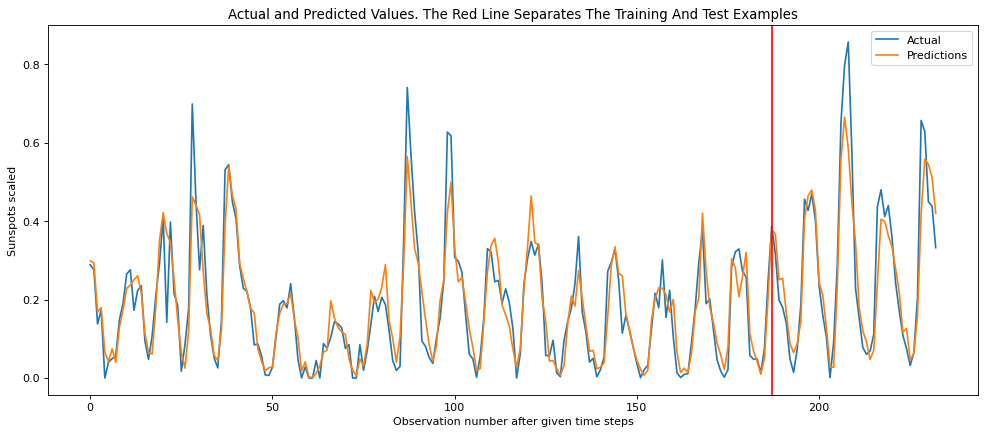

In [45]:
#Plot result
plot_result(trainY, testY, train_predict, test_predict)

Scratch Plots:

In [33]:
# Plot multiple years
#trainX[0:2,:,0].shape
trainX.shape

(187, 12, 1)

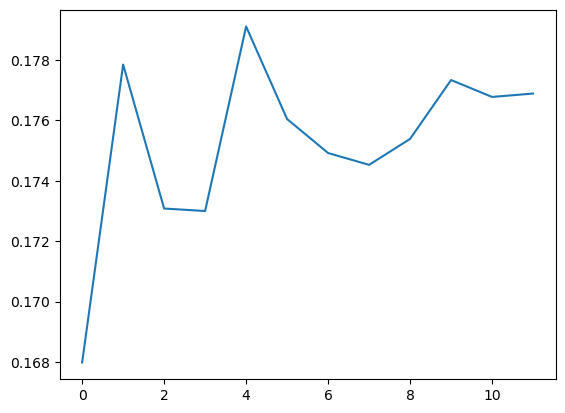

In [29]:
plt.plot(np.mean(trainX[:,:,0],axis=0))
plt.show()

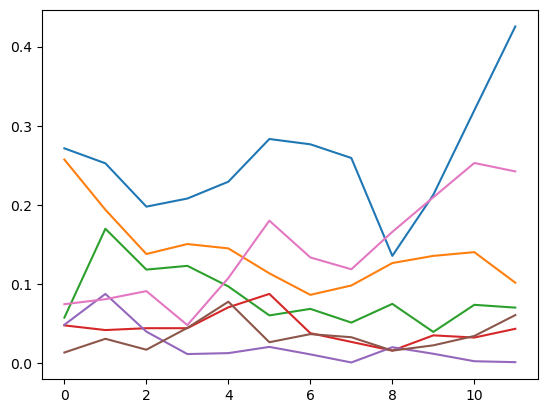

In [35]:
plt.plot(trainX[180:187, :, 0].transpose())
plt.show()